In [104]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [105]:
c = -100
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#Now using the rk2 method
def I_RK2(t,h,a1,b1):
    f1 = F(t)
    f2 = F(t+h)

    ##a1 and b1 defined in ETDRK2

    part1 = f1*a1

    part2 =(f2-f1)*b1

    return  (part1 + part2)
    

In [106]:
T = Total_Time = np.pi/2
N = Number_of_Points = 10
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

In [107]:

def ETDRK2(Total_Time, Number_of_Points, Initial_Condition, method = "taylor"):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition

    h = T/N ## calculate the step size based on the number of points
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0

    ## calculate coefficients to be used in the integral
    if method == "taylor":
        a1 = h   + c*h**2/2 + c**2*h**3/6 + c**3*h**4/24 ## (e^(ch)-1)/c
        b1 = h/2 + c*h**2/6 + c**2*h**3/24 ## (e^(ch) - (1 + ch))/(h*c^2)
    elif method == "contour":
        M = 32  # number of points for complex means
        r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
        z = c*h + r
        a1 = h*np.mean((np.exp(z)-1)/z).real
        b1 =  h*np.mean((np.exp(z)-1-z)/(z**2)).real
    elif method == "naive":
        a1 = (np.exp(c*h)-1)/c
        b1 = (np.exp(c*h)-1-c*h)/(h*(c**2))
    else:
        raise ValueError("method must be contour, taylor or naive")




    for i in range(N):
        I = I_RK2(tvec[i],h,a1,b1)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [108]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

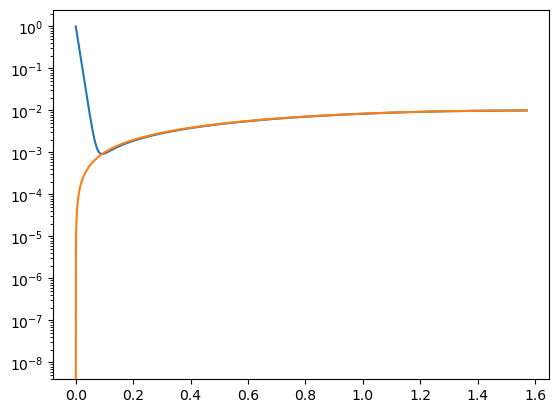

In [109]:
plt.semilogy(x, U_true(x,1))
plt.plot(x, 0.01*np.sin(x))

In [110]:
T = Total_Time = np.pi/2
N = Number_of_Points = 1000
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

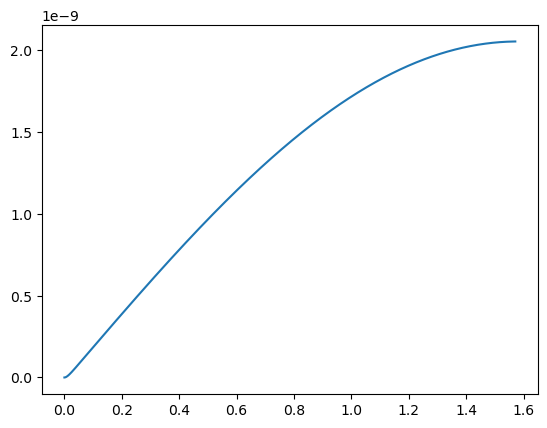

In [111]:
y,x = ETDRK2(T,N,u_0, method="naive")
plt.plot(x,np.abs(y - U_true(x,1)))

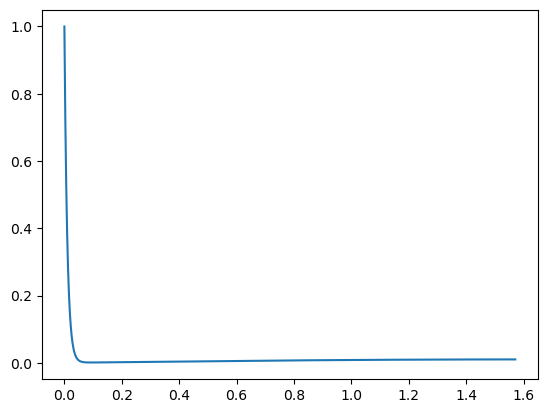

In [112]:
plt.plot(x,y)

In [113]:
errorN = 14
c = -100
## h = np.pi/(2*N)
## N = np.int((1.6)*10**)
Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((np.pi/2)*(10**(1+i/2)))
Test_H  = (np.pi/2)/Test_N

In [114]:
Error_Vec1 =np.zeros(errorN)
Error_Vec2 = np.zeros(errorN)
Error_Vec3 = np.zeros(errorN)
#k = np.array([])
time_start = time.time()
for i in range(0, errorN):
    
    (y1,x) = ETDRK2(T, Test_N[i], u_0, method="naive")
    (y2,x) = ETDRK2(T, Test_N[i], u_0, method="taylor")
    (y3,x) = ETDRK2(T, Test_N[i], u_0, method="contour")

    #print(x.size)
    yTrue = U_true(x,u_0)
    y_tfinal = yTrue[-1]
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #k = np.append(k,np.abs((y1[-1] - yTrue[-1])/yTrue[-1]))
    time_now = time.time()
    print("you are", round(i/errorN,2)*100, "% complete,", round(time_now-time_start,2), "seconds have elapsed and you are on step", i)
    Error_Vec1[i] = np.abs((y1[-1] - yTrue[-1])/yTrue[-1])
    Error_Vec2[i] = np.abs((y2[-1] - yTrue[-1])/yTrue[-1])
    Error_Vec3[i] = np.abs((y3[-1] - yTrue[-1])/yTrue[-1])

you are 0.0 % complete, 0.0 seconds have elapsed and you are on step 0
you are 7.000000000000001 % complete, 0.01 seconds have elapsed and you are on step 1
you are 14.000000000000002 % complete, 0.01 seconds have elapsed and you are on step 2
you are 21.0 % complete, 0.01 seconds have elapsed and you are on step 3
you are 28.999999999999996 % complete, 0.03 seconds have elapsed and you are on step 4
you are 36.0 % complete, 0.09 seconds have elapsed and you are on step 5
you are 43.0 % complete, 0.26 seconds have elapsed and you are on step 6
you are 50.0 % complete, 0.79 seconds have elapsed and you are on step 7
you are 56.99999999999999 % complete, 2.81 seconds have elapsed and you are on step 8
you are 64.0 % complete, 9.59 seconds have elapsed and you are on step 9
you are 71.0 % complete, 29.81 seconds have elapsed and you are on step 10
you are 79.0 % complete, 75.49 seconds have elapsed and you are on step 11
you are 86.0 % complete, 220.23 seconds have elapsed and you are on 

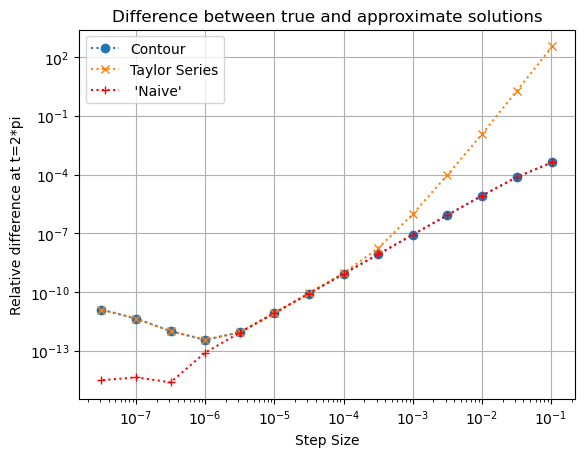

In [117]:
plt.loglog(Test_H, Error_Vec3, ':o', label = "Contour")
plt.loglog(Test_H, Error_Vec2, ':x', label = "Taylor Series")
plt.loglog(Test_H, Error_Vec1, 'r:+', label = " 'Naive' ")
#plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.xlabel("Step Size")
plt.ylabel("Relative difference at t=2*pi")
plt.title("Difference between true and approximate solutions")
plt.legend()
plt.grid()